In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [39]:
html_start = """<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <meta http-equiv="X-UA-Compatible" content="ie=edge">
    <title>Companies</title>
    <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css" integrity="sha384-ggOyR0iXCbMQv3Xipma34MD+dH/1fQ784/j6cY/iJTQUOhcWr7x9JvoRxT2MZw1T" crossorigin="anonymous">
    <script src="https://code.jquery.com/jquery-3.3.1.slim.min.js" integrity="sha384-q8i/X+965DzO0rT7abK41JStQIAqVgRVzpbzo5smXKp4YfRvH+8abtTE1Pi6jizo" crossorigin="anonymous"></script>
 <style>
    body {
      background-color: rgb(41, 41, 46);
    }

    .links {
      text-decoration: none;
      color: rgb(135, 192, 241);
    }
  </style>
</head>
<body>
    <div class="container-fluid">
        <h1 class="px-3 py-2 text-center text-light">Companies</h1>"""

In [40]:
c = pd.read_csv('Companies_to_Look_For_P.csv')
c.dropna(inplace=True, thresh=5)

In [41]:
c["CTC"] = c["Salary"].apply(lambda x: float(x.split(" ")[0]))
c["Base Salary"] = c["Salary"].apply(lambda x: float(x.split(" ")[1]))

In [42]:
c.drop(columns=["Salary"], inplace=True)

In [43]:
c["Preference"] = c["Preference"].astype(int)
c["Positions"] = c["Positions"].astype(int)

In [44]:
c.sort_values(by=["Preference", "CTC", "Positions"], inplace=True, ascending=[True, False, False])

In [45]:
c.reset_index(inplace=True, drop=True)
c.set_index(np.arange(1, len(c) + 1), inplace=True)
c.head()

,Company,Designation,Profile,Location,Preference,Apllied,Current Status,Remarks,Positions,CTC,Base Salary
1,Javis,Machine Learning Engineer,Analyst,Bangalore Mumbai Gurgaon,1,Y,Applied,Applied;,2,36.0,20.0
2,PayU,Associate Data Scientist,Analyst,Bangalore Gurgaon,1,Y,Coding Test Done on 12 Oct,Applied;Coding Test on 12 Oct;,5,22.0,18.0
3,FourthFrontier,Data Scientist,Analyst,Bangalore,1,NaN,NaN,NaN,1,22.0,22.0
4,SLB,Data Scientist,Analyst,Pune,1,NaN,NaN,NaN,3,16.0,15.0
5,SLB,Machine Learning Engineer,Analyst,Pune,1,NaN,NaN,NaN,2,16.0,15.0


In [46]:
html_start+= c.to_html(classes='table table-striped table-hover table-bordered table-dark', index=True, justify='center', border=0, escape=False)
html_start = html_start.replace(""" style="text-align: right;">""", ">")
html_start = html_start.replace("""border="1" """, "")
html_start = html_start.replace("dataframe", "")
html_start+="</div></body></html>"

In [47]:
with open("index.html", "w") as f:
    f.write(html_start)

In [48]:
len(c)

74

# Some Visualizations

In [49]:
pref = [1,2,3,4,5]
num_companies = [len(c[c["Preference"] <= i]) for i in pref]

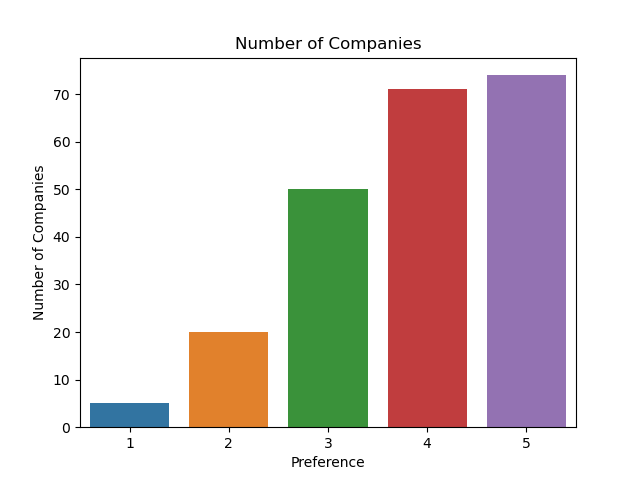

In [50]:
%matplotlib widget
# plt.figure(figsize=(10, 7))
sns.barplot(x=pref, y=num_companies)
plt.title("Number of Companies")
plt.xlabel("Preference")
plt.ylabel("Number of Companies");

In [51]:
fig = px.bar(x=pref, y=num_companies, labels={"x": "Preference", "y": "Number of Companies"}, color = num_companies)
fig.update_layout(title="Number of Companies")
fig.show()

In [52]:
#Plot by Profile count
profile_count = c["Profile"].value_counts()
fig = px.bar(x=profile_count.index, y=profile_count.values, labels={"x": "Profile", "y": "Number of Companies"}, color = profile_count.index)
fig.update_layout(title="Number of Companies by Profile")
fig.show()